
Runtime Table :
| Number of Agents per Side | Average Runtime (seconds) |
|---------------------------|---------------------------|
| 10                        | 0.000132                  |
| 50                        | 0.001144                  |
| 90                        | 0.003932                  |
| 130                       | 0.007014                  |
| 170                       | 0.013835                  |
| 210                       | 0.020685                  |


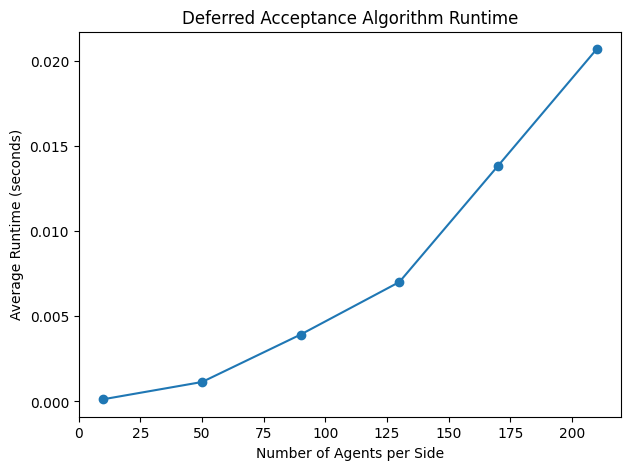

In [83]:
import time
import matplotlib.pyplot as plt
from matching_algorithms import deferred_acceptance
from matching_algorithms import generate_instance

def run_experiment(start_size, end_size, step_size, num_trials):
    sizes = range(start_size, end_size + 1, step_size)
    avg_runtimes = []
    table_data = []

    for size in sizes:
        total_runtime = 0
        for _ in range(num_trials):
            # Generate instance
            men_preferences, women_preferences = generate_instance(size)
            
            # Measure runtime
            start_time = time.time()
            deferred_acceptance(men_preferences, women_preferences)
            end_time = time.time()
            
            total_runtime += (end_time - start_time)
        
        avg_runtime = total_runtime / num_trials
        avg_runtimes.append(avg_runtime)
        table_data.append([size, f"{avg_runtime:.6f}"])

    # Create and print Markdown table
    print("\nRuntime Table :")
    print("| Number of Agents per Side | Average Runtime (seconds) |")
    print("|---------------------------|---------------------------|")
    for row in table_data:
        print(f"| {row[0]:<25} | {row[1]:<25} |")

    # Plot results
    plt.figure(figsize=(7, 5))
    plt.plot(sizes, avg_runtimes, marker='o')
    plt.title("Deferred Acceptance Algorithm Runtime")
    plt.xlabel("Number of Agents per Side")
    plt.ylabel("Average Runtime (seconds)")
    plt.show()

# Run the experiment
run_experiment(start_size=10, end_size=210, step_size=40, num_trials=10)